In [ ]:
#EX N0: 07         Perform Analysis on KNN Classification Technologies   Bharath Kumar S 
#Date:26/02/24                                                           URK22AI1030

AIM:
The aim of this project is to develop a KNN classification model for the Social_Network dataset using scikit-learn. The model will predict whether an individual will purchase a product or not based on their gender, age, and estimated salary.

DESCRIPTION:

In this project, we will build a KNN classification model using scikit-learn. We will use the Social_Network dataset, which contains information about individuals including their gender, age, estimated salary, and whether they purchased a particular product or not. We will use the columns 'Gender', 'Age', and 'EstimatedSalary' as independent variables and the target variable will be 'Purchased'. The categorical values of the target column will be encoded into numerical values. The data will be divided into training and testing sets. We will perform the classification using K=3 and analyze the performance of the classifier using various performance measures such as confusion matrix, accuracy, recall, precision, specificity, f-score, ROC curve, and AUC score. Additionally, we will apply feature scaling to the independent variables and compare the performance. Finally, we will change the value of K to 5, 7, 9, and 11 and tabulate the TP, TN, accuracy, f-score, and AUC score obtained for each value of K.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve,roc_auc_score,auc

In [2]:

data = pd.read_csv('Social_Network.csv')
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15668575,0,26,43000,No
1,15603246,0,27,57000,No
2,15598044,0,27,84000,No
3,15727311,0,35,65000,No
4,15570769,0,26,80000,No
...,...,...,...,...,...
395,15672330,1,47,34000,Yes
396,15807837,1,48,33000,Yes
397,15592570,1,47,23000,Yes
398,15635893,1,60,42000,Yes


In [3]:
X = data[['Gender', 'Age', 'EstimatedSalary']]
print(X.head())

   Gender  Age  EstimatedSalary
0       0   26            43000
1       0   27            57000
2       0   27            84000
3       0   35            65000
4       0   26            80000


In [4]:
Y = data['Purchased']
print(Y.head())

0    No
1    No
2    No
3    No
4    No
Name: Purchased, dtype: object


In [5]:
le=LabelEncoder()
Y=le.fit_transform(Y)
print(Y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [7]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [8]:
Y_pred = knn.predict(X_test)
print(Y_pred)

[0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 1
 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0]


In [9]:
confusion = confusion_matrix(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f_score = f1_score(Y_test, Y_pred)
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = auc(fpr, tpr)

In [10]:
print("Confusion Matrix:")
print(confusion)

Confusion Matrix:
[[49  8]
 [21 22]]


In [11]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F-Score:", f_score)
print("AUC Score:", roc_auc)

Accuracy: 0.71
Precision: 0.7333333333333333
Recall: 0.5116279069767442
F-Score: 0.6027397260273972
AUC Score: 0.6856385148918809


AUC score: 0.6856385148918809


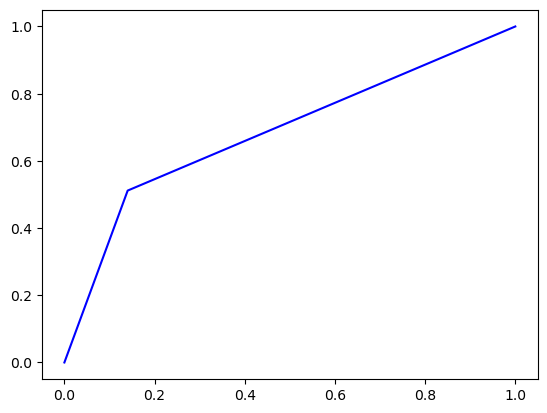

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import  roc_curve as dl
fpr, tpr, thresholds = dl(Y_test, Y_pred)
from sklearn.metrics import auc as dn
plt.plot(fpr,tpr,linestyle="-",color="blue")
auc_score = dn(fpr, tpr)
print("AUC score:", auc_score)
